Inserire numero Cluster:  5
Inserire numero azienda 65


-----------------------------------------------------------------------------
Numero vittorie: 
109
---------------------------------------------------------------------------------------------------
Posizione iniziale centroidi
[[4.77494176e+02 3.71013403e+04 2.39921711e+01]
 [1.29857895e+03 1.63281226e+07 1.74736842e+01]
 [9.24838710e+02 6.82666100e+06 2.48709677e+01]
 [1.05855607e+03 1.19603493e+06 1.64906542e+01]
 [1.14110000e+03 3.16327572e+06 1.74600000e+01]]
---------------------------------------------------------------------------------------------------


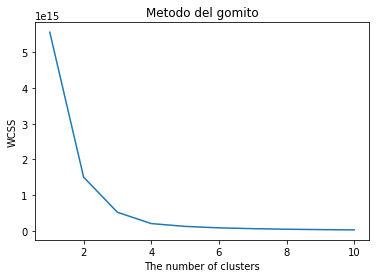

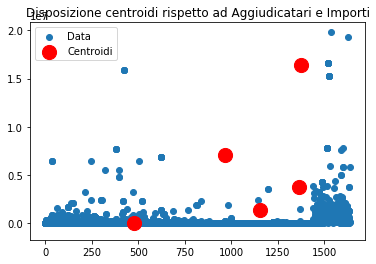

---------------------------------------------------------------------------------------------------
Posizione finale centroidi
[[4.77340974e+02 4.10472966e+04 2.40082703e+01]
 [1.37564286e+03 1.64279086e+07 1.33571429e+01]
 [9.68391304e+02 7.08284243e+06 2.31739130e+01]
 [1.15545517e+03 1.41485107e+06 1.72206897e+01]
 [1.36265385e+03 3.78582065e+06 1.60000000e+01]]
---------------------------------------------------------------------------------------------------
Accuratezza
0.931981981981982
---------------------------------------------------------------------------------------------------
X=   Aggiudicatari  Importi  Categorie
0             65   123649         15, Predicted=0
Confusion Matrix
[[4138   14   23  144   26]
 [  94    0    0    1    0]
 [   0    0    0    0    0]
 [   0    0    0    0    0]
 [   0    0    0    0    0]]
-------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

C:\Users\franc\Anacondaa\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


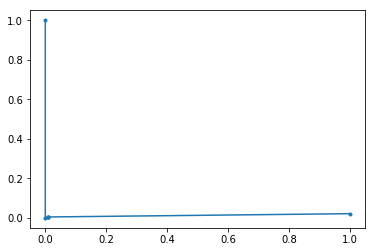

In [3]:
#### from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.model_selection import train_test_split
import mglearn  
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import time
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from inspect import signature
from matplotlib import pyplot

from sklearn.metrics import average_precision_score
df = pd.read_csv("Definitivo.csv", sep=";")

lista=[]
count=0
cluster=int(input('Inserire numero Cluster: '))
i=input('Inserire numero azienda')
for row in df.iterrows():
    #print(row[1]['Aggiudicatari'])
    agg=str(row[1]['Aggiudicatari'])
    confronto=str(i)
    if(agg==confronto):
         lista.append(1)
         count=count+1
    else:
        lista.append(0)
print("-----------------------------------------------------------------------------")
print("Numero vittorie: ")        
print(count)
df.insert(3,"Class",lista) 
#lista.clear() 
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, shuffle=True)
#plt.scatter(X)  

                 
kmeans = KMeans(n_clusters=cluster).fit(X)
centroids = kmeans.cluster_centers_
print("---------------------------------------------------------------------------------------------------")
print("Posizione iniziale centroidi")
print(centroids)

wcss=[]
print("---------------------------------------------------------------------------------------------------")
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title("Metodo del gomito")
plt.xlabel("The number of clusters")
plt.ylabel("WCSS")
plt.show()


kmeans = KMeans(n_clusters=cluster, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X_train)
plt.title("Disposizione centroidi rispetto ad Aggiudicatari e Importi")
plt.scatter(X['Aggiudicatari'], X['Importi'],label="Data")

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red',label="Centroidi")
plt.legend()
plt.show()
print("---------------------------------------------------------------------------------------------------")
centroids = kmeans.cluster_centers_
print("Posizione finale centroidi")
print(centroids)

assignments = kmeans.labels_
print("---------------------------------------------------------------------------------------------------")
print('Accuratezza')
accuratezza=accuracy_score(y_train,assignments)
print(accuratezza)
print("---------------------------------------------------------------------------------------------------")

time.sleep(2)
test=pd.read_csv("test_set.csv", sep=";")
ynew = kmeans.predict(test)
print("X=%s, Predicted=%s" % (test, ynew[0]))

#VALUTAZIONE ALGORITMO
print("Confusion Matrix")
print(confusion_matrix(y_train,assignments))
print("-------------------------------------------------------------------------------")
print("Classification Report")
print(classification_report(y_train,assignments))
print("-------------------------------------------------------------------------------")
print("Accuratezza")
print(accuracy_score(y_train,assignments))

print("-------------------------------------------------------------------------------")
precision, recall, thresholds = precision_recall_curve(y_train,assignments)
pyplot.plot(recall, precision, marker='.')
# show the plot
pyplot.show()